# Tarea 1: Reconocimiento de Patrones en Minería de Datos


## Parte I: Análisis de rendimiento de distintos algoritmos de clustering

Ideas interesantes:
* Graficar siempre los clusters (colores) obtenidos.
* Utilizar un contraste de hipótesis para deteminar la mejor combinación de hiperparámetros.
* 8


In [11]:
import csv
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as skc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import skfuzzy.cluster as fuzzy

data=pd.read_csv("smile.txt", sep='\t', header=None)


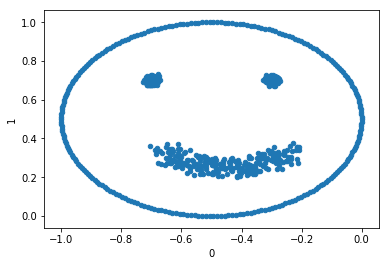

In [3]:
data.plot(kind='scatter',x=0,y=1)
plt.show()

In [4]:
def k_means(k=4):
    kmeans = skc.KMeans(n_clusters=k, random_state=0).fit(data)
    centroids=kmeans.cluster_centers_
    clusters=kmeans.predict(data)
    score=silhouette_score(data, clusters)
    print('silhoute score:',score)
    plt.plot(centroids[:,0], centroids[:,1], 'o', markersize=10, markerfacecolor='w', markeredgewidth=1.5, markeredgecolor=(0, 0, 0, 1))
    plt.scatter(data[0], data[1], c=clusters)
interact(k_means, k=(2,30,1))

interactive(children=(IntSlider(value=4, description='k', max=30, min=2), Output()), _dom_classes=('widget-interact',))

<function __main__.k_means>

In [5]:
def AHC_complete(k=4):
    AHC = skc.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')  
    clusters=AHC.fit_predict(data)
    score=silhouette_score(data, clusters)
    print('silhoute score:',score)
    plt.scatter(data[0],data[1], c=AHC.labels_, cmap='rainbow')
interact(AHC_complete, k=(2,15,1))

interactive(children=(IntSlider(value=4, description='k', max=15, min=2), Output()), _dom_classes=('widget-interact',))

<function __main__.AHC_complete>

In [12]:
def AHC_single(k):
    AHC = AgglomerativeClustering(n_clusters=k, linkage='single')  
    clusters=AHC.fit_predict(data)
    score=silhouette_score(data, clusters)
    print('silhoute score:',score)
    plt.scatter(data[0],data[1], c=AHC.labels_, cmap='rainbow')
interact(AHC_single, k=4)

interactive(children=(IntSlider(value=4, description='k', max=12, min=-4), Output()), _dom_classes=('widget-interact',))

<function __main__.AHC_single>

In [ ]:
def DBSCAN(eps=0.1, min_points=100):
    dbscan = skc.DBSCAN(eps=eps, min_samples = min_points)
    clusters = dbscan.fit_predict(data)
    score=silhouette_score(data, clusters)
    print('silhoute score:',score)

    # plot the cluster assignments
    plt.scatter(data[0],data[1], c=clusters, cmap="plasma")
interact(DBSCAN, min_points=(5,200,1), eps=(0.01,0.29,0.01))

In [ ]:
def MS(bandwidth):
    ms = skc.MeanShift(bandwidth=bandwidth)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    score=silhouette_score(data, ms.labels_)
    print('silhoute score:',score)

    print("number of estimated clusters : %d" % n_clusters_)

    # #############################################################################
    # Plot result
    plt.scatter(data[0],data[1], c=ms.labels_)
interact(MS,bandwidth=0.1 )

In [ ]:
def SC(n=4,affinity='rbf',gamma=100, n_neighbors=5):
    spectralClustering = skc.SpectralClustering(n_clusters=n,eigen_solver='arpack',assign_labels="kmeans",random_state=0, affinity=affinity, gamma=gamma, n_neighbors=5).fit(data)
    score=silhouette_score(data, spectralClustering.labels_)
    print('silhoute score:',score)
    plt.scatter(data[0],data[1], c=spectralClustering.labels_, cmap="plasma")
interact(SC,n =(2,15,1),affinity =['rbf', 'nearest_neighbors'],gamma=100, n_neighbors=(5,100,1) )

In [ ]:
def Fuzzy(k=4):
    
    data2=data.T
    cntr, u, u0, d, jm, p, fpc=fuzzy.cmeans(data2,k,5, error=0.005, maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)
    score=silhouette_score(data, cluster_membership)
    print('silhoute score:',score)
    plt.scatter(data[0],data[1], c=cluster_membership, cmap="plasma")
interact(Fuzzy, k=(2,15,1))